#  <span style="color:darkblue"> Initial Boundary Value PDEs </span>

<hr style="border:6px solid black"> </hr>

# Learning Objectives

- Be able to recognize Laplace & Poisson equations
- Describe the basic steps involved in the Method of Lines (MOL)
- Apply knowledge of how discretize interior nodes
- Apply knowledge of how to discretize exterior nodes for each boundary condition (Neumann, Robin, Dirichlet)
- Formulate the system of ODEs created with MOL by interlacing variables on a rectangular grid.

<hr style="border:6px solid black"> </hr>

# Simulating a graded catalyst bed

A suction pyrometer is a commonly used instrument for measuring gas phase temperatures in extemely hot environments (one example given [here](https://pubmed.ncbi.nlm.nih.gov/24248279/)). In these environments, it's quite typical to observe a large amount of radiative heat flux. This will typically dominate the heat transfer between the gas phase and an object. As a consequence, directly immersing a measurement device, such as a thermocouple or resistance temperature detector (RTD) into the process gas, will yield meaningless results. Moreover, an object left in this environment for a long period of time will increase in temperature until it too emits a significant amount of thermal radiation. So simply shielding a sensor isn't a viable solution either. This issue is circumvented by using a suction pyrometer. This device consistes of a small jacketing tube attached to a sensor (thermocouple or RTD) and a vacuum pump. By drawing gas through the tube, the jacket is cooled preventing emission, and allowing for a valid reading from the internal sensor. A picture is included below:

<img src="pyrometer_pde_pic.png" width=900>

The key design considerations behind the suction pyrometer are the superficial velocity and Biot number needed to ensure that the temperature rise of the process gas in the jacket is minimal. We'll construct a basic model of heat transfer in this tube and use it to determine adequate settings for reading our temperature range of interest. 

We'll consider a constant heat capacity gas which we're measuring using a 1ft (0.3048 m) by 0.25 inch (0.00635 m) diameter tube. Heat transfer at the wall surface is proportional to the temperature difference and characterized by the Biot number.

## A basic descriptive model

A two-dimensional steady-state energy balance is given by:

\\[u_s C_{p} \frac{\partial T}{\partial z} = \frac{\Lambda}{R}\frac{\partial}{\partial R}\left(R\frac{\partial T}{\partial R}\right), \\]

**Limiting cases:** Consider briefly under what conditions we might assume that this equation reduces to the Poisson or Laplace equations below.

1. **Poisson Equation:** \\[\nabla^2 x = f(x) \\]
2. **Laplace Equation:** \\[\nabla^2 x = 0 \\] 

Next, we assume a sufficient cooling flow exists to hold the reactor wall temperature constant at a fixed value of . Then, we can write a symmetry and cooling boundary condition:

\\[\left.\frac{\partial T}{\partial R}\right\vert_{R=0} = 0 \qquad \qquad \left.\frac{\partial T}{\partial R}\right\vert_{R=R_t} = -Bi(T - T^c) \\]

Note that the symmetry condition (at $R = 0$) is of the Neumann type and the wall boundary condition (at $R = R_t$) is of the Robin type. 

## Further model development

Assume the inlet stream is well-mixed and at known temperature:

\\[\mathbf T(z=0)=\mathbf T_{in}. \\]

This is because boundary conditions are known in the radial dimension and the system is fully specified at the reactor entrance for all variables (initial temperature).
     
<div class="alert alert-block alert-info">
<b>Note:</b> This problem is treated as an IBVP and not a 2D BVP.
</div>

## Method of Lines Derivation

We now make use of second-order approximations for the derivatives in the radial direction

\\[\left.\frac{\partial u}{\partial R}\right\vert_{r=R_j} = \frac{u_{j+1} - u_{j-1}}{2\Delta R} \\]
\\[\left.\frac{\partial^2 u}{\partial R^2}\right\vert_{r=R_j} = \frac{u_{j+1} - 2u_{j} + u_{j-1}}{\Delta R^2} \\]

where \\[\Delta R_{j} = R_{j+1} - R_{j}\\]

### Method of Lines Derivation - Interior
Applying these rules to the energy balance for the interior nodes, where  is the number of spatial nodes for discretizing the  dimension, we have

\\[\frac{\partial T}{\partial z} = \left(u_s C_P\right)^{-1}\left(\frac{\Lambda}{R}\frac{\partial}{\partial R}\left(R\frac{\partial T}{\partial R}\right)\right) \\]


\\[\left.\frac{d T}{d z}\right\vert_{R=R_j} = \left(u_s C_{p}\right)^{-1}\left(\frac{D}{R}\frac{T_{j+1} - T_{j-1}}{2\Delta R} + D\frac{T_{j+1} - 2T_{j} + T_{j-1}}{\Delta R^2}\right)  \qquad j = 2, \ldots, N_{r-1} \\]

### Method of Lines Derivation - Center
The discretization at the center node ($R=0, j=1$) yields: 

\\[\frac{d T_1}{d z} = \left(u_s C_P\right)^{-1}\left(\frac{\Lambda}{R}\frac{T_{2} - T_{0}}{2\Delta R} + \Lambda \frac{T_{2} - 2T_{1} + T_{0}}{\Delta R^2}\right).\\]

From the boundary condition we have 

\\[\left.\frac{\partial T}{\partial R}\right|_{R=0} = 0 \Rightarrow \frac{T_{2} - T_{0}}{2\Delta R} = 0 \Rightarrow  T_{0} = T_{2} \\]

Substituting this into the previous expression yields:

\\[\frac{d T_1}{d z} = \left(u_s C_P\right)^{-1}\left(\frac{2\Lambda}{\Delta R^2}(T_{2} - T_{1})\right). \\]

<div class="alert alert-block alert-warning">
<b>Activity!</b> This derivation proceeded by solving obtaining algebraic equations from the boundary condition, solving them analytically for the fictive node value, and then substituting this expression in. We could have instead solved a system of coupled differential and algebraic equations (referred to as a differential-algebraic system of equations or DAEs). In many cases, the algebraic equations formed may not have an analytic (closed form) solution and we must resort to solving DAEs. What type of boundary condition(s) may lead algebraic equations with no analytic solution?
</div>

### Method of Lines Derivation - Wall
The discretization at the wall node yeilds:

\\[\frac{d T_{N_r}}{d z} = \left(u_s C_p\right)^{-1}\left(\frac{\Lambda}{R}\frac{T_{N_{r+1}} - T_{N_{r-1}}}{2\Delta R} + \Lambda \frac{T_{N_{r+1}} - 2T_{N_r} + T_{N_{r-1}}}{\Delta R^2}\right) \\]

From the boundary condition we have

\\[\left.\frac{\partial T}{\partial R}\right|_{R=R_t} = 0 \Rightarrow \frac{T_{N_{r+1}} - T_{N_{r-1}}}{2\Delta R} = -Bi(T_{N_r} - T^c) \Rightarrow  T_{N_{r+1}} = T_{N_{r-1}} -2Bi\Delta R (T_{N_r} - T^c). \\]

Substituting this in yields:

\\[\frac{d T_{N_r}}{d z} = \left(u_s C_p\right)^{-1}\left(\frac{Bi\Lambda}{R}(T^c - T_{N_r}) + \frac{2\Lambda}{\Delta R^2}(T_{N_{r-1}} - T_{N_r} + Bi\Delta R (T^c - T_{N_r}))\right). \\]

We'll now use a ODE solver readily available in DifferentialEquations.jl to integrate the above system of differential equations.

<div class="alert alert-block alert-warning">
<b>Activity!</b> Manipulate the code below, to determine the superficial velocity at which a temperature rise of 2K is observed in the tube for gas temperatures ranging from 900 to 1000.
</div>

## Solution

For simplicity's sake, we'll assume the following physical constants are valid over the range of interest (constant heat capacities, and thermal heat dispersion coefficients).

In [1]:
# Input model parameters
tube_length = 0.3048          # tube length [m]
tube_radius = 0.00635/2       # radius [m]

heat_coeff = 7.3871/3.6       # heat dispersion coefficient [J/(m s K)]

Tc = 1400                     # Tube temperature [K]
T0 = 900                      # Gas design temperature [K]  MANIPULATE THIS 
biot_number = 0.001           # Biot number, Bi 

us = 0.1                      # superficial flow rate (m/h) MANIPULATE THIS                        
Cp = 0.74                     # pseudo heat capacity

nr = 20                       # number of discretization points in radial direction
delR = tube_radius/(nr - 1);   

We'll use the adaptive step-size implicit Euler method built into DifferentialEquations.jl to solve the problem. You can read more about the built-in solvers and functionality for DifferentialEquations.jl [here](https://diffeq.sciml.ai/v2.0/). We first define the right-hand side function for the differential equation below. 

In [7]:
function f(out, y, p, t)
    # Set up center boundary condition rhs equations
    out[1] = (Cp*us)^(-1)*((2*heat_coeff/delR^2)*(y[3] - y[1]))

    # Define interior node right-hand-side equations
    for i = 2:(nr-1)
        r = i*delR; # get node radial position
        # energy balance discretized equation 
        out[i] = (heat_coeff*(Cp*us)^-1)*((y[i+1] - y[i])/(2*delR*r) + (y[i+1] - 2*y[i] + y[i-1])/delR^2)
    end

    # Set up wall boundary condition rhs equations
    r = (nr-1)*delR
    out[nr] = (2*heat_coeff*(Cp*us)^(-1))*(y[nr - 1]/delR^2 - y[nr]*(biot_number*(1/r + 1/delR) + 1/delR^2) + 
               biot_number*(1/(2*r) + 1/delR)*Tc)
    return 
end

f (generic function with 1 method)

Now we build and solve the corresponding ODEs problem. 

<div class="alert alert-block alert-info">
<b>Note:</b> If this is your first time using DifferentialEquations.jl or Plots.jl some time may be spent precompiling. So taking a coffee break after clicking run on the below cell wouldn't be ill-advised.
</div>

In [14]:
import Pkg; Pkg.add("DifferentialEquations"); Pkg.add("Plots")
using DifferentialEquations

y0 = [T0 for i = 1:nr]                          # set initial condition to inlet temperature
prob = ODEProblem(f, y0, (0, tube_length))      # create an ODE problem and solve it
sol = solve(prob)
println("ODE Integrated")                       # Displays when complete

  Resolving package versions...
No Changes to `C:\Users\wilhe\Project.toml`
No Changes to `C:\Users\wilhe\Manifest.toml`
  Resolving package versions...

ODE Integrated


No Changes to `C:\Users\wilhe\Project.toml`
No Changes to `C:\Users\wilhe\Manifest.toml`


We now generate a plot of the centerline temperature versus position. If Plots.jl hasn't been used before yet this may also take some time.

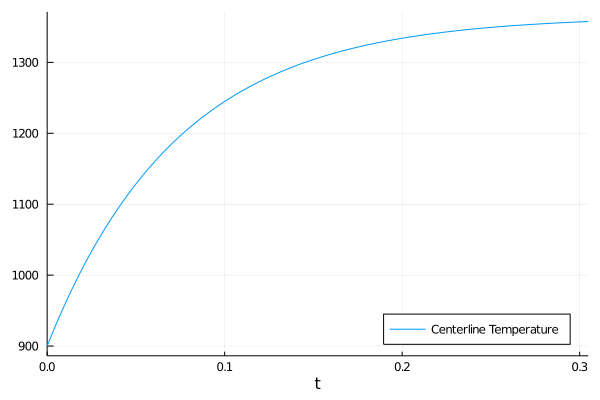

In [15]:
using Plots
plot(sol, label="Centerline Temperature", legend=:bottomright, vars = 1)

<hr style="border:6px solid black"> </hr>

# Questions for reflection
- For a simple, what factors influence whether a system is numerically stable?
- For IVP-PDEs, the problem size can grow quite rapidly. For a 3D systems, using 20 discretization points in each dimension leads to an 8000-by-8000 system while 256 points leads to a ~16 million by ~16 million system. As illustrated by [Jaroudi, et al.](https://www.tandfonline.com/doi/full/10.1080/00207160.2019.1613526?af=R), a large number of such systems can be solved in a few hours on standard desktop. In light of this fact, how do you think the resulting linear systems formulated and solved?
- What are some other questions that you'd expect to be important when design a chemical looping combustion system? Can you provide some ideas of how numerical methods could be used to help answer these?

<hr style="border:6px solid black"> </hr>